# Extraindo dados da Covid19 via API
### Fonte de Dados: https://brasil.io/dataset/covid19/
### Augusto SPINELLI

### Licença
Os dados dados convertidos estão sob a licença Creative Commons Attribution ShareAlike. Caso utilize os dados, cite a fonte original e quem tratou os dados, como: Fonte: Secretarias de Saúde das Unidades Federativas, dados tratados por Álvaro Justen e colaboradores/Brasil.IO. Caso compartilhe os dados, utilize a mesma licença.

***

## Exploração de Dados

In [2]:
#importando dependencias
import pandas as pd
import numpy as np
import os

#Caminho dos arquivos RAW
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
estados_data_path = os.path.join(raw_data_path, 'estados.json')
cidades_data_path = os.path.join(raw_data_path, 'cidades.json')

#criando dataframes brutos/raw
cidadesRaw_df = pd.read_json(cidades_data_path)
estadosRaw_df = pd.read_json(estados_data_path)

In [3]:
#transformando dados para dataframes finais com orientação correta
cidades = cidadesRaw_df['results']
cidades_df = pd.read_json(cidades.to_json(),orient='index')

estados = estadosRaw_df['results']
estados_df = pd.read_json(estados.to_json(),orient='index')

In [4]:
#verificando dataframes
cidades_df.info()
estados_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5150 entries, 0 to 5149
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   city                            5150 non-null   object        
 1   city_ibge_code                  5133 non-null   float64       
 2   confirmed                       5150 non-null   int64         
 3   confirmed_per_100k_inhabitants  5068 non-null   float64       
 4   date                            5150 non-null   datetime64[ns]
 5   death_rate                      5150 non-null   float64       
 6   deaths                          5150 non-null   int64         
 7   estimated_population_2019       5133 non-null   float64       
 8   is_last                         5150 non-null   bool          
 9   order_for_place                 5150 non-null   int64         
 10  place_type                      5150 non-null   object        
 11  stat

### Visualizações Exploratórias

O **Gráfico BoxPlot (gato de bigodes)** nos dá uma ótima visão das distribuições nos quartis estatísticos, assim como nos ajuda a identificar de forma fácil a existência de outliers (estranhos no ninho).

No caso abaixo, criamos um BoxPLot com o número de confirmados por 100k habitantes no dataframe dos estados brasileiros. Pela presença dos pontos acima dos bigodes do BoxPLot, notamos que **dois estados possuem uma taxa de mortos por 100k habitantes BEM MAIOR que a média nacional**.

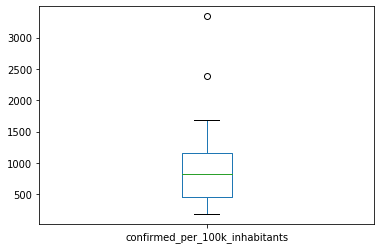

In [5]:
estados_df.confirmed_per_100k_inhabitants.plot(kind='box');

Podemos observar que os 5 estados com maior número de confirmados por 100k habitantes estão abaixo, com destaque especial para Amapá e Roraima, os nossos pontos acima do bigode do BoxPlot.

Outro insight também pode ser notado: **até o presente momento, os estados da região norte do Brasil têm o maior número de confirmados para cada 100k habitantes**.

Será que isso é reflexo de um baixo nível de isolamento, ou simplesmente estão testando mais lá?

In [6]:
estados_df[['state','confirmed_per_100k_inhabitants','confirmed','deaths']].sort_values(by=['confirmed_per_100k_inhabitants'],ascending=False).head()

,state,confirmed_per_100k_inhabitants,confirmed,deaths
3,AP,3340.66033,28253,413
25,RR,2386.91497,14459,281
2,AM,1686.36420,69893,2792
6,DF,1561.08843,47071,559
0,AC,1490.58604,13146,361


### Vamos observar a distribuição total de casos por estados

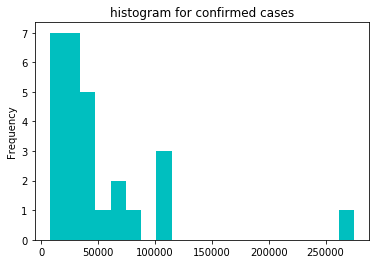

In [7]:
estados_df.confirmed.plot(kind='hist', title='histogram for confirmed cases', color='c',bins=20);

Um estado se destaca com maisde 250k casos. Já sabemos pelo noticiário que é o estado de SP, mas vamos confirmar? 

In [8]:
estados_df[['state','confirmed']].sort_values(by=['confirmed'],ascending=False).head()

,state,confirmed
22,SP,275145
17,RJ,111883
5,CE,108225
12,PA,103206
9,MA,78969


O uso de um **gráfico KDE** é util para observarmos a densidade dos casos. Percebemos que a curva de casos por estado ainda está concentrada na faixa de 0-100k casos, com exceção da *lombada* próxima dos 300k casos que é São Paulo.

Aparentemente, o noticiário e a observação do gráfico de densidade KDE nos indica que **a pandemia tem um potencial de deslocar essa curva para a direita nos próximos meses**, com a explosão de casos em outros estados.

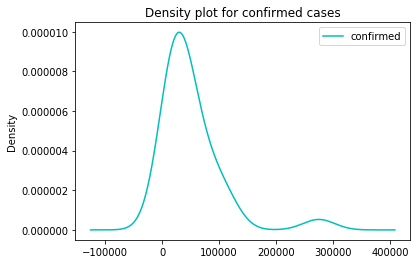

In [9]:
estados_df[['confirmed']].plot(kind='kde', title='Density plot for confirmed cases', color='c');


Um scatter plot pode ser usado para ver a correlação entre duas variáveis

No caso de número de confirmados por 100k habitantes e população observamos uma correlação de que as menores populações dos estados são também aquelas onde a taxa de confirmados por 100 mil habitantes é maior. No entanto, a taxa de mortes dos estados com menor população também é menor

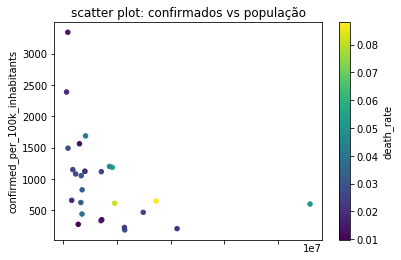

In [10]:
estados_df.plot.scatter(x='estimated_population_2019',y='confirmed_per_100k_inhabitants', c='death_rate', colormap='viridis', title='scatter plot: confirmados vs população');

### Os estados com maior taxa de mortos são RJ e PE com mais de 8%

In [21]:
estados_df.loc[(estados_df.death_rate > 0.03),['death_rate','state','confirmed']].sort_values(by=['death_rate'],ascending=False)

,death_rate,state,confirmed
17,0.0880,RJ,111883
14,0.0818,PE,58476
5,0.0561,CE,108225
22,0.0523,SP,275145
12,0.0477,PA,103206
2,0.0399,AM,69893
11,0.0385,MT,15328
7,0.0359,ES,45097
24,0.0343,RN,28970
15,0.0325,PI,20422


### Vamos agora explorar um pouco mais os dados com visualizações mais interessantes no próximo notebook...